In [1]:
import os, sys
from blossom import *

In [6]:
organism_list = DatasetIO.load_organism_dataset('datasets/organisms_ds0010.txt')
organism_list

[<organism.Organism at 0x106f96fd0>, <organism.Organism at 0x106fb3048>]

In [8]:
organism_list_vars = [vars(organism) for organism in organism_list]
organism_list_vars

[{'action_type': 'move_only',
  'age': 10,
  'alive': True,
  'dna': '0000',
  'dna_length': 4,
  'drinking_type': None,
  'eating_type': None,
  'food_capacity': None,
  'food_current': None,
  'food_initial': None,
  'food_intake': None,
  'food_metabolism': None,
  'max_age': 15,
  'max_time_without_food': None,
  'max_time_without_water': None,
  'movement_type': 'simple_random',
  'mutation_rate': None,
  'organism_id': '393e32c5-94e2-4d96-8387-74be0556318e',
  'position': [7],
  'reproduction_type': 'pure_replication',
  'sex': None,
  'species_name': 'species1',
  'water_capacity': None,
  'water_current': None,
  'water_initial': None,
  'water_intake': None,
  'water_metabolism': None},
 {'action_type': 'move_only',
  'age': 10,
  'alive': True,
  'dna': '0000',
  'dna_length': 4,
  'drinking_type': None,
  'eating_type': None,
  'food_capacity': None,
  'food_current': None,
  'food_initial': None,
  'food_intake': None,
  'food_metabolism': None,
  'max_age': 15,
  'max_time

In [9]:
organism_ids = [organism.organism_id for organism in organism_list]
organism_ids

['393e32c5-94e2-4d96-8387-74be0556318e',
 '17b231e0-f277-4130-a9e2-720c9665d87a']

In [11]:
positions = [organism.position for organism in organism_list]
positions

[[7], [5]]

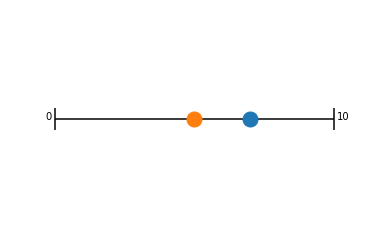

In [24]:
import matplotlib.pyplot as plt

# set up the figure
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(-1,11)
ax.set_ylim(0,10)

# draw lines
xmin = 0
xmax = 10
y = 5
height = 1

plt.hlines(y, xmin, xmax)
plt.vlines(xmin, y - height / 2., y + height / 2.)
plt.vlines(xmax, y - height / 2., y + height / 2.)

# draw a point on the line
x = 4
for position in positions:
    plt.plot(position,y, 'o', ms = 15)


# add numbers
plt.text(xmin - 0.1, y, '0', horizontalalignment='right')
plt.text(xmax + 0.1, y, '10', horizontalalignment='left')

plt.axis('off')
plt.savefig('test.pdf', bbox_inches='tight')
plt.show()

/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


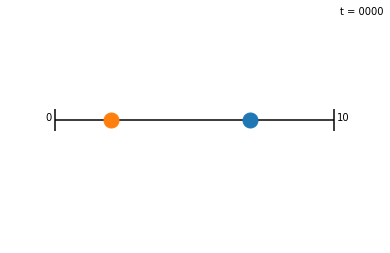

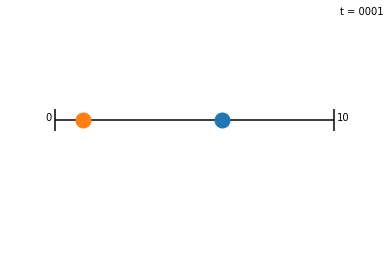

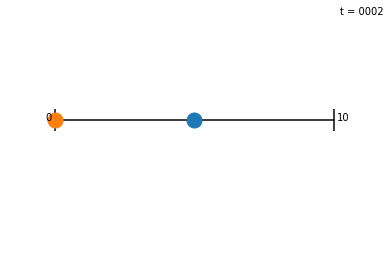

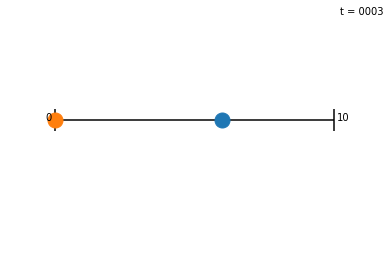

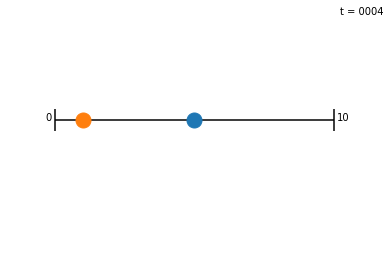

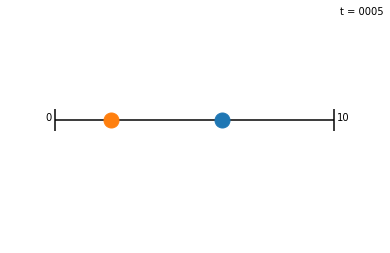

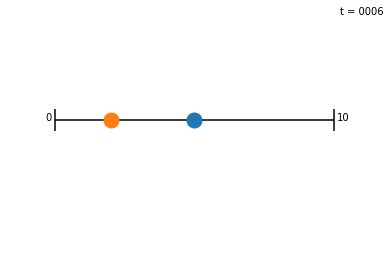

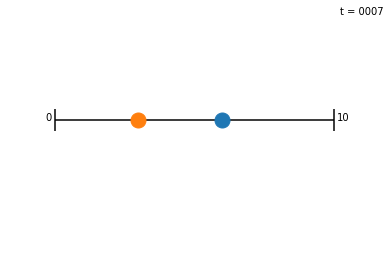

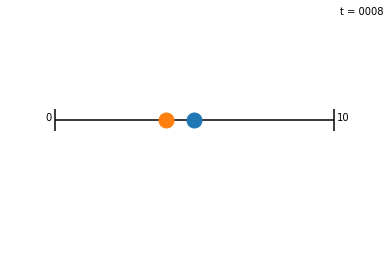

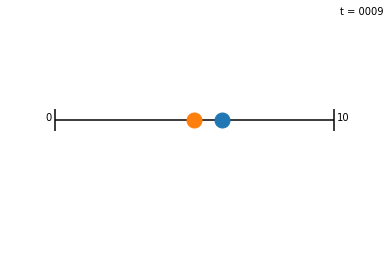

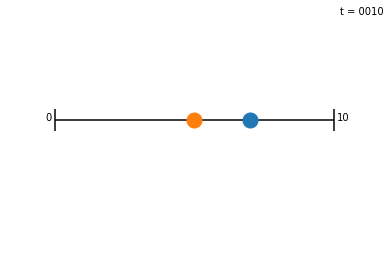

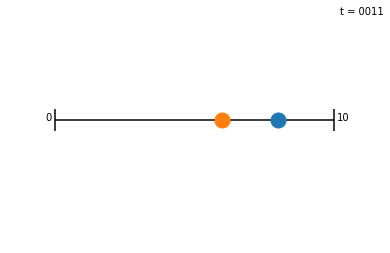

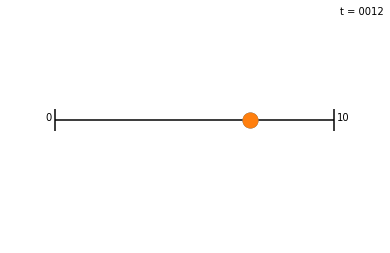

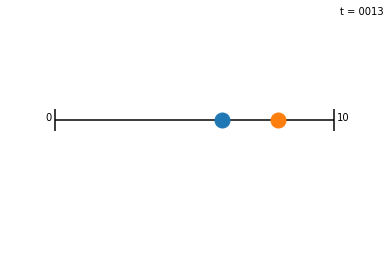

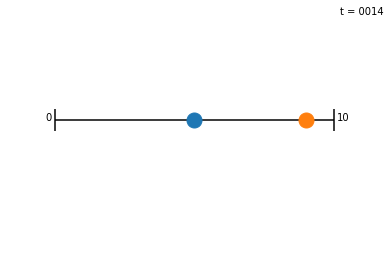

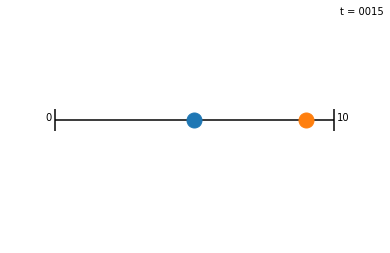

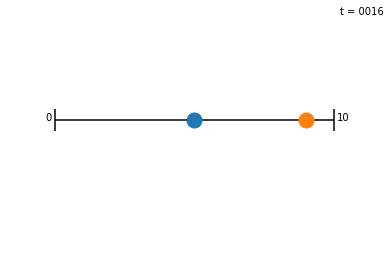

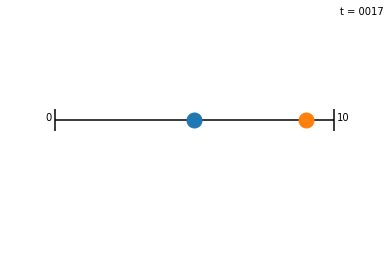

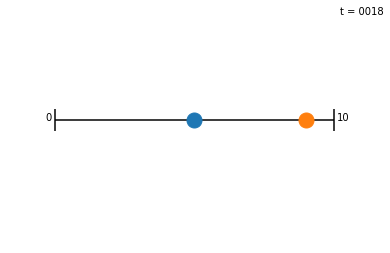

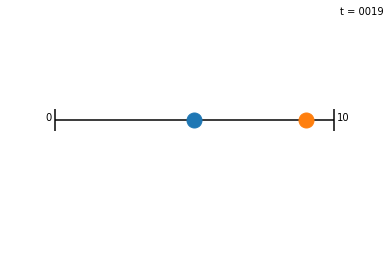

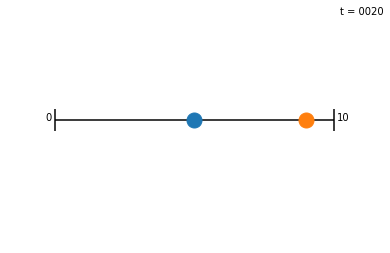

In [54]:
for i in range(21):
    organism_list = DatasetIO.load_organism_dataset('datasets/organisms_ds%04d.txt' % i)
    
    # set up the figure
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlim(-1,11)
    ax.set_ylim(0,10)

    # draw lines
    xmin = 0
    xmax = 10
    y = 5
    height = 1

    plt.hlines(y, xmin, xmax)
    plt.vlines(xmin, y - height / 2., y + height / 2.)
    plt.vlines(xmax, y - height / 2., y + height / 2.)

    # draw a point on the line
    for organism in organism_list:
        plt.plot(organism.position,y, 'o', ms = 15)

    plt.text(1, 1,'t = %04d' % i, horizontalalignment='center',
        verticalalignment='center',
        transform=ax.transAxes)

    # add numbers
    plt.text(xmin - 0.1, y, '0', horizontalalignment='right')
    plt.text(xmax + 0.1, y, '10', horizontalalignment='left')

    plt.axis('off')
    plt.savefig('images/1D_ds%04d.png' % i, bbox_inches='tight')
    # plt.show()

In [63]:
try:
    os.remove('images/movie.mp4')
except OSError:
    pass
os.system("ffmpeg -r 1 -pattern_type glob -i 'images/1D_ds????.png' -c:v libx264 -vf 'fps=25,scale=trunc(iw/2)*2:trunc(ih/2)*2' -pix_fmt yuv420p images/movie.mp4")

0